In [4]:
import numpy as np
import matplotlib .pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [5]:
clusters_dataset =np.array([[10/416,14/416],[23/416,27/416],[37/416,58/416],[81/416,82/416],[135/416,169/416],[344/416,319/416]])

In [6]:
clusters_dataset

array([[0.02403846, 0.03365385],
       [0.05528846, 0.06490385],
       [0.08894231, 0.13942308],
       [0.19471154, 0.19711538],
       [0.32451923, 0.40625   ],
       [0.82692308, 0.76682692]])

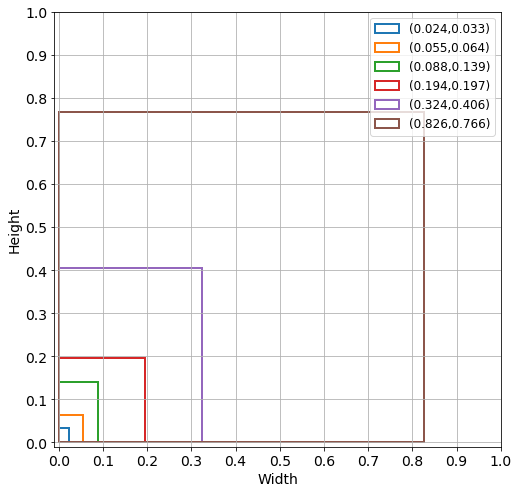

In [7]:
import matplotlib

fig,ax = plt.subplots(1)
fontsize = 14
num_clusters = 6
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray"]
for i in range(num_clusters):
    label = "(" + str(clusters_dataset[i,0])[:5] +"," +str(clusters_dataset[i,1])[:5]+ ")"
    rect=matplotlib.patches.Rectangle((0.0,0.0),clusters_dataset[i,0],clusters_dataset[i,1],linewidth=2,edgecolor=colors[i],facecolor='none',label = label)
    ax.add_patch(rect)
plt.xlim([-0.01,1])
plt.ylim([-0.01,1])
plt.xlabel("Width",fontsize = fontsize)
plt.ylabel("Height",fontsize = fontsize)
plt.xticks(np.arange(0,1.1,0.1),fontsize=fontsize)
plt.yticks(np.arange(0,1.1,0.1),fontsize=fontsize)
plt.grid()
plt.legend(prop={'size': 12})
#plt.savefig("best_anchor_boxes",dpi=400)

#print(clusters_dataset[str(num_clusters)])
#plt.savefig("original_anchor_boxes.png",format="png",dpi=200)

In [12]:
import os
import pandas as pd
root_path = "/tf/home/sergio/Tesis"

In [43]:
import cv2
BOX_COLOR = (0, 0, 255)
#BOX_COLOR = (255,0,0)
def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2):
    
    #x_center, y_center, width, height = bbox#*416
    x_min,y_min,x_max,y_max=bbox
    #x_min = int(x_center-(width//2))
    #y_min = int(y_center-(height//2))
    #x_max = int(x_center+(width//2))
    #y_max = int(y_center+(height//2))
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=(0,0,255), thickness=thickness)
    return img

def generate_image(image,bboxes):
    img = image.copy()
    for idx, bbox in enumerate(bboxes):
        #print(idx)
        img = visualize_bbox(img, bbox)
    #plt.imshow(img)
    return img
    
def new_frame(image,bboxes,color=BOX_COLOR):
    img = image.copy()
    for idx, bbox in enumerate(bboxes):
        #print(idx)
        img = visualize_bbox(img, bbox,color=color)
    return img

In [25]:
os.chdir(root_path+"/COCODataset/coco_csvs")
annotations_set = pd.read_csv("COCO_annotations_train.csv")
annotations_set.drop("Unnamed: 0",axis=1)

,file_name,xmin,ymin,xmax,ymax
0,000000262145.jpg,0.604688,0.166511,0.831250,0.920609
1,000000262145.jpg,0.772359,0.213208,0.790641,0.251054
2,000000262145.jpg,0.441203,0.203255,0.491453,0.430468
3,000000262145.jpg,0.822141,0.103372,0.963547,0.543653
4,000000262145.jpg,0.767984,0.190141,0.831203,0.390000
...,...,...,...,...,...
262456,000000524282.jpg,0.807469,0.000000,0.858609,0.032813
262457,000000524282.jpg,0.026969,0.166292,0.092703,0.325833
262458,000000524282.jpg,0.345469,0.170042,0.382391,0.254333
262459,000000524282.jpg,0.000000,0.254479,0.036578,0.324146


In [79]:
annotations_set.tail(20)

,Unnamed: 0,file_name,xmin,ymin,xmax,ymax
262441,262445,000000262124.jpg,0.000234,0.459772,0.058094,0.663614
262442,262446,000000524273.jpg,0.482922,0.430492,0.502859,0.473911
262443,262447,000000131058.jpg,0.482016,0.132729,0.952250,0.986667
262444,262448,000000131058.jpg,0.388453,0.219625,0.526344,0.526792
262445,262449,000000131058.jpg,0.084453,0.109229,0.427359,0.782667
262446,262450,000000393207.jpg,0.659484,0.248886,0.808563,0.989861
262447,262451,000000393207.jpg,0.220984,0.393900,0.237859,0.481365
262448,262452,000000393207.jpg,0.194688,0.387604,0.224453,0.503510
262449,262453,000000262136.jpg,0.332980,0.098053,0.510780,0.701520
262450,262454,000000524282.jpg,0.494391,0.256937,0.566453,0.457896


[[0.719828125 0.3704791666666667 0.8605 0.8535833333333334]
 [0.127640625 0.30979166666666663 0.246625 0.8390833333333333]]
480 640


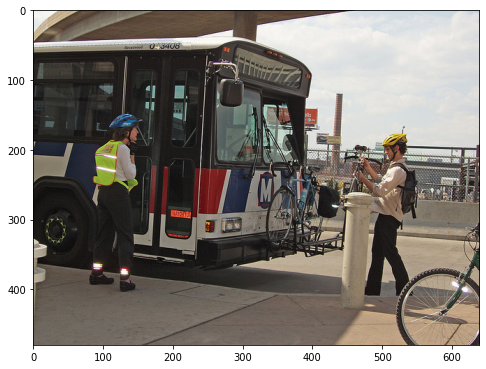

In [128]:
os.chdir(root_path+"/COCODataset/pedestrian_dataset_train")

num_image = ""
#000000004331
image = "000000004331.jpg"
boxes =annotations_set[annotations_set.file_name==image].values[:,2:]

print(boxes)
img = cv2.imread(image)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(im_rgb)
height,width,_ =img.shape
print(height,width)

boxes[:,0]=boxes[:,0]*width
boxes[:,2]=boxes[:,2]*width
boxes[:,1]=boxes[:,1]*height
boxes[:,3]=boxes[:,3]*height

In [129]:
img = im_rgb.copy()
for idx, bbox in enumerate(boxes):
    
    x_min,y_min,x_max,y_max=np.int32(bbox)
    cv2.rectangle(img, (x_min, y_min),(x_max, y_max),(255,0,0) , thickness=2)


(480, 640, 3)


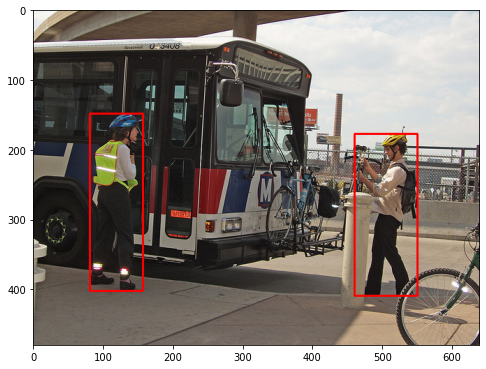

In [130]:
plt.imshow(img)
print(img.shape)

In [ ]:
000000000927.jpg
000000004331
000000000761